In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/Fire_Incidents_20240102.csv'
df = pd.read_csv(path)
df.head()

<ipython-input-4-674a3b989abc>:2: DtypeWarning: Columns (12,13,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


,Incident Number,Exposure Number,ID,Address,Incident Date,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,...,Detector Effectiveness,Detector Failure Reason,Automatic Extinguishing System Present,Automatic Extinguishing Sytem Type,Automatic Extinguishing Sytem Perfomance,Automatic Extinguishing Sytem Failure Reason,Number of Sprinkler Heads Operating,Supervisor District,neighborhood_district,point
0,8028304,0,80283040,150 Elsie St.,2008-04-01T00:00:00,80920257,2008-04-01T18:06:37,2008-04-01T18:15:19,2008-04-01T18:21:48,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,Bernal Heights,POINT (-122.41837339 37.74208979)
1,8028303,0,80283030,85 Turner Tr.,2008-04-01T00:00:00,80920256,2008-04-01T18:00:52,2008-04-01T18:06:30,2008-04-01T18:22:18,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Potrero Hill,POINT (-122.39489 37.756291)
2,8028309,0,80283090,175 6th St.,2008-04-01T00:00:00,80920262,2008-04-01T18:42:06,2008-04-01T18:45:23,2008-04-01T18:53:25,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South of Market,POINT (-122.407468 37.78008)
3,8028314,0,80283140,633 Hayes St.,2008-04-01T00:00:00,80920268,2008-04-01T19:03:52,2008-04-01T19:08:39,2008-04-01T19:35:36,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,Hayes Valley,POINT (-122.42684908 37.77612642)
4,8028319,0,80283190,27th Av. / Cabrillo St.,2008-04-01T00:00:00,80920273,2008-04-01T19:16:12,2008-04-01T19:23:48,2008-04-01T19:28:49,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outer Richmond,POINT (-122.4863941 37.77428492)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57123 entries, 0 to 57122
Data columns (total 64 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Incident Number                               57123 non-null  int64  
 1   Exposure Number                               57123 non-null  int64  
 2   ID                                            57123 non-null  int64  
 3   Address                                       57123 non-null  object 
 4   Incident Date                                 57123 non-null  object 
 5   Call Number                                   57123 non-null  int64  
 6   Alarm DtTm                                    57123 non-null  object 
 7   Arrival DtTm                                  57122 non-null  object 
 8   Close DtTm                                    57123 non-null  object 
 9   City                                          57123 non-null 

In [8]:
df['Alarm DtTm'] = pd.to_datetime(df['Alarm DtTm'])

In [26]:
time = df['Alarm DtTm'].iloc[0]
df['Hour'] = df['Alarm DtTm'].apply(lambda time:time.hour)
df['Month'] = df['Alarm DtTm'].apply(lambda time:time.month)
df['Day Week'] = df['Alarm DtTm'].apply(lambda time:time.dayofweek)

dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day Week']= df['Day Week'].map(dmap)

In [13]:
df['Month'].head()

0    4
1    4
2    4
3    4
4    4
Name: Month, dtype: int64

,index,Count
0,Sat,8580
1,Fri,8307
2,Sun,8171
3,Wed,8140
4,Mon,8029
5,Thu,7953
6,Tue,7943


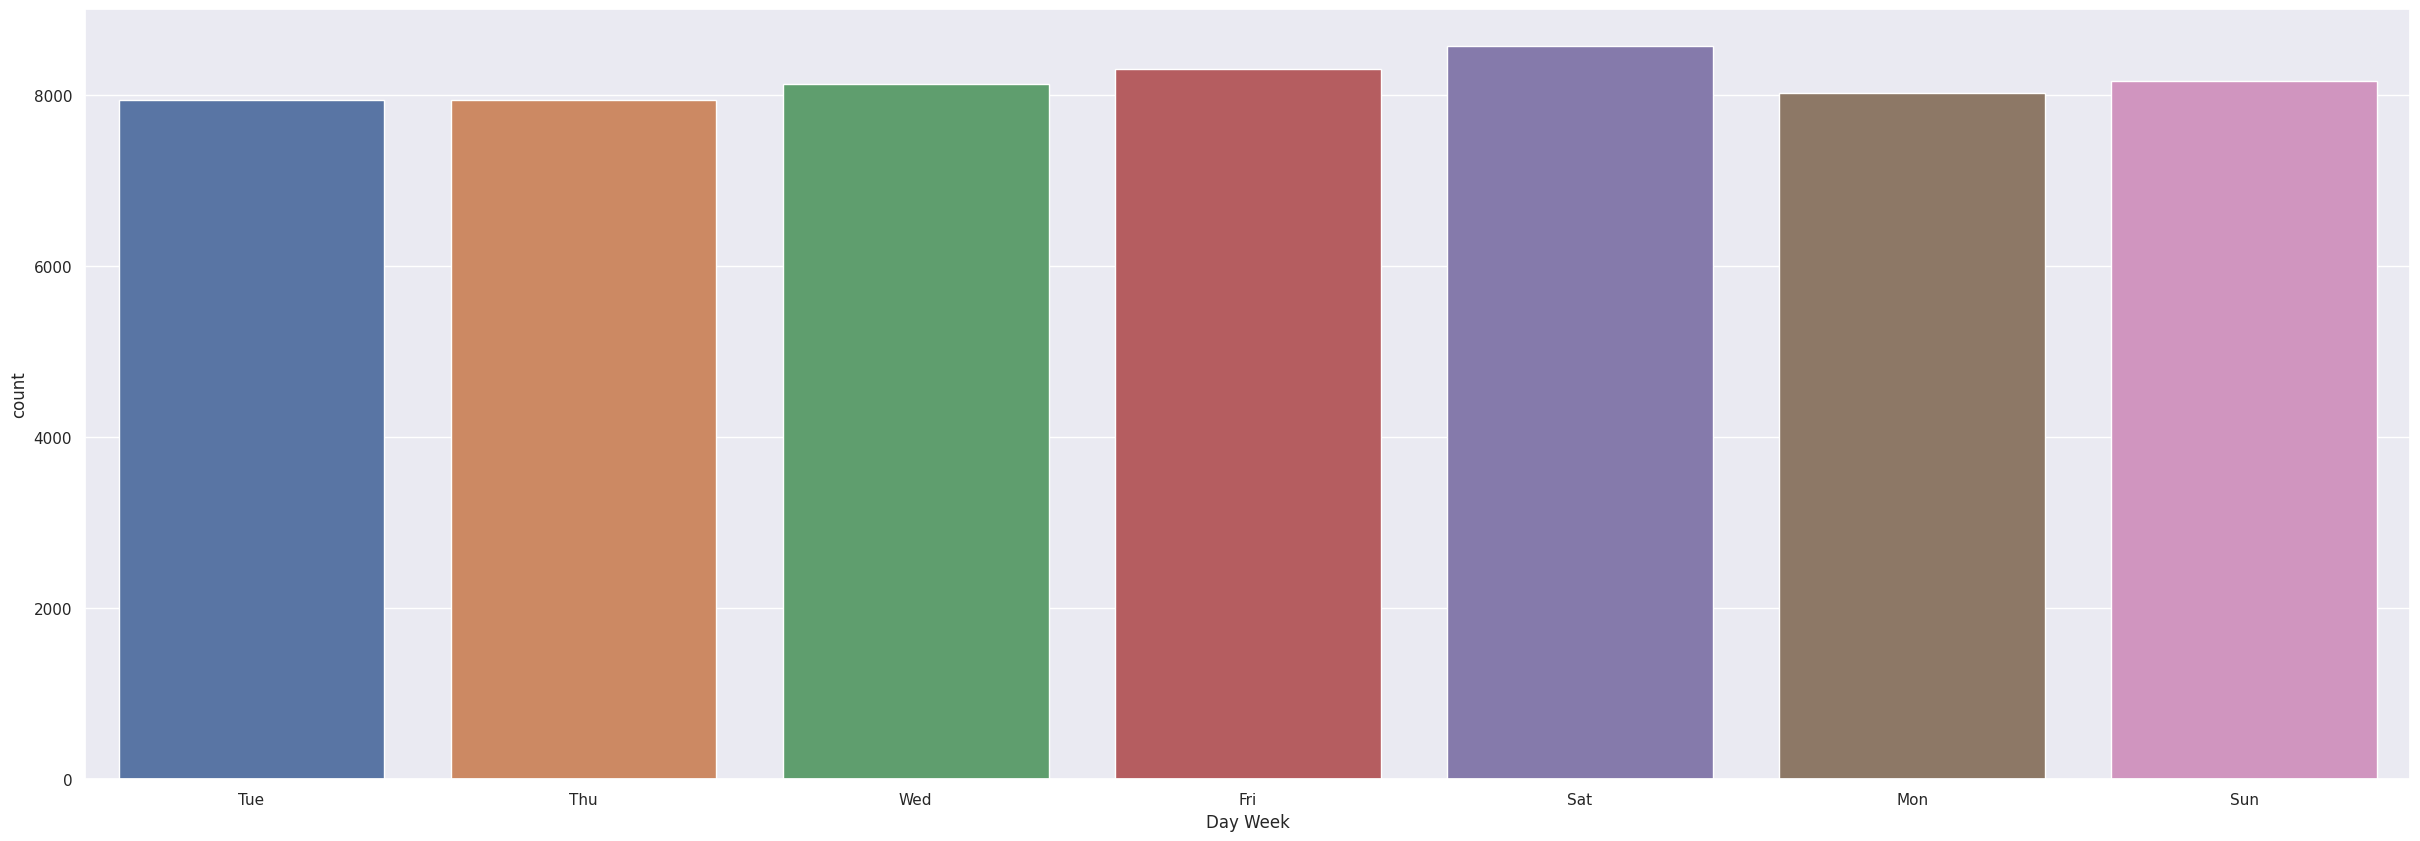

In [23]:
sns.set(rc={'figure.figsize':(30,10)})
sns.countplot(x='Day Week',data=df)

df['Day Week'].value_counts().head(30).to_frame(name='Count').reset_index()\
                .style.background_gradient(cmap='Blues', subset='Count')

<Axes: ylabel='Month'>

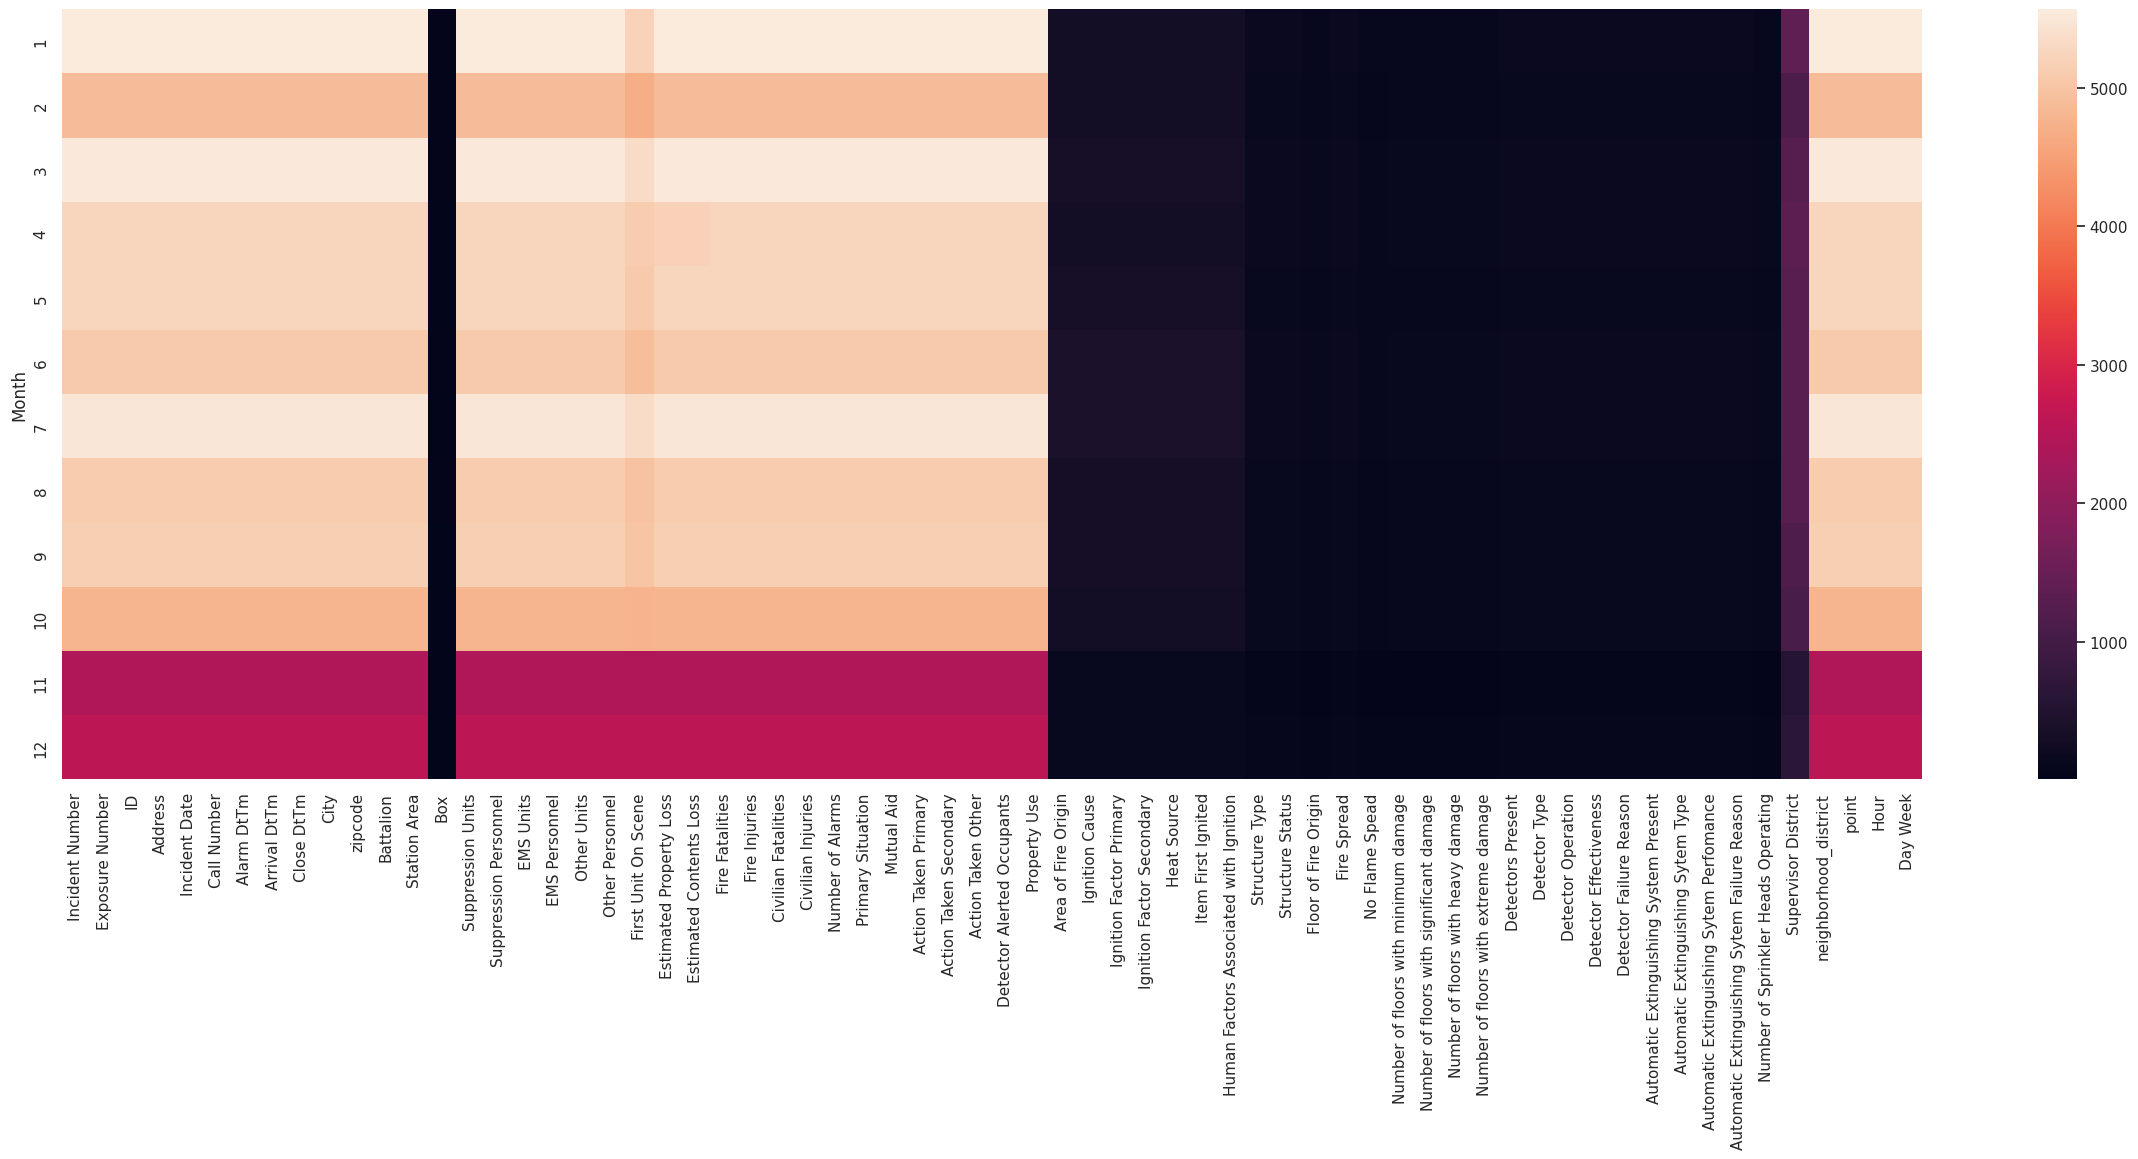

In [30]:
sns.heatmap(df.groupby('Month').count())

<ipython-input-33-ae63476add19>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


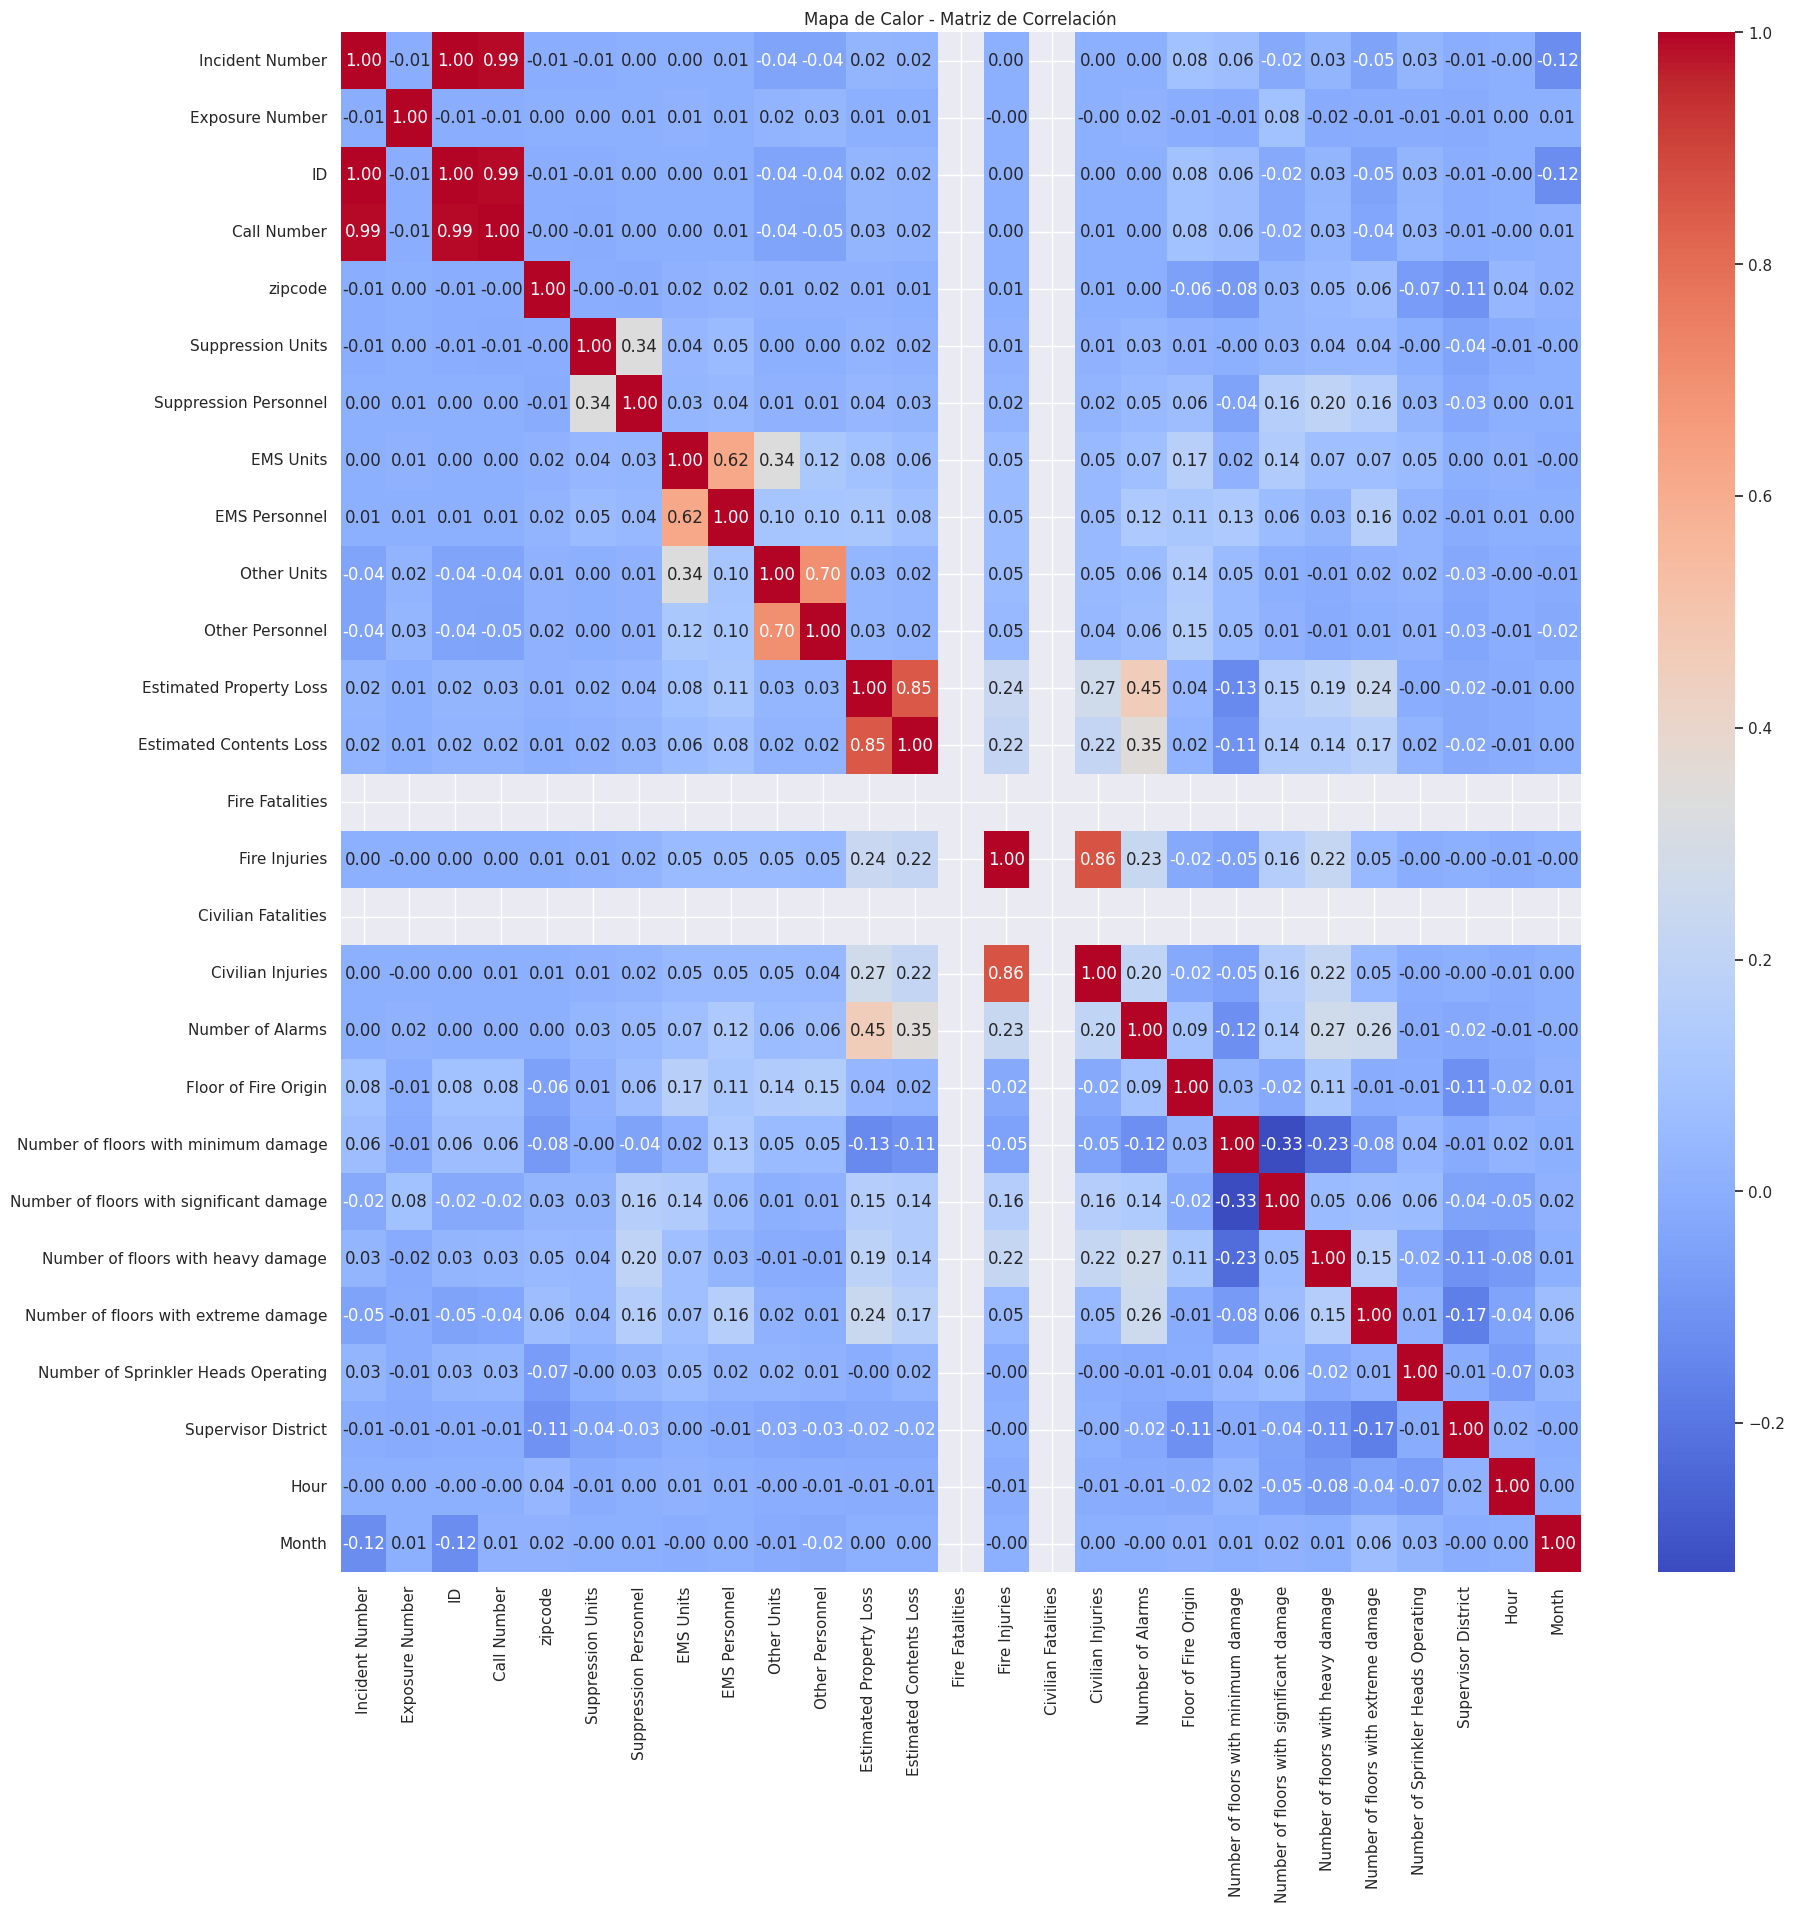

In [33]:
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor - Matriz de Correlación')
plt.show()

<Axes: xlabel='Month', ylabel='count'>

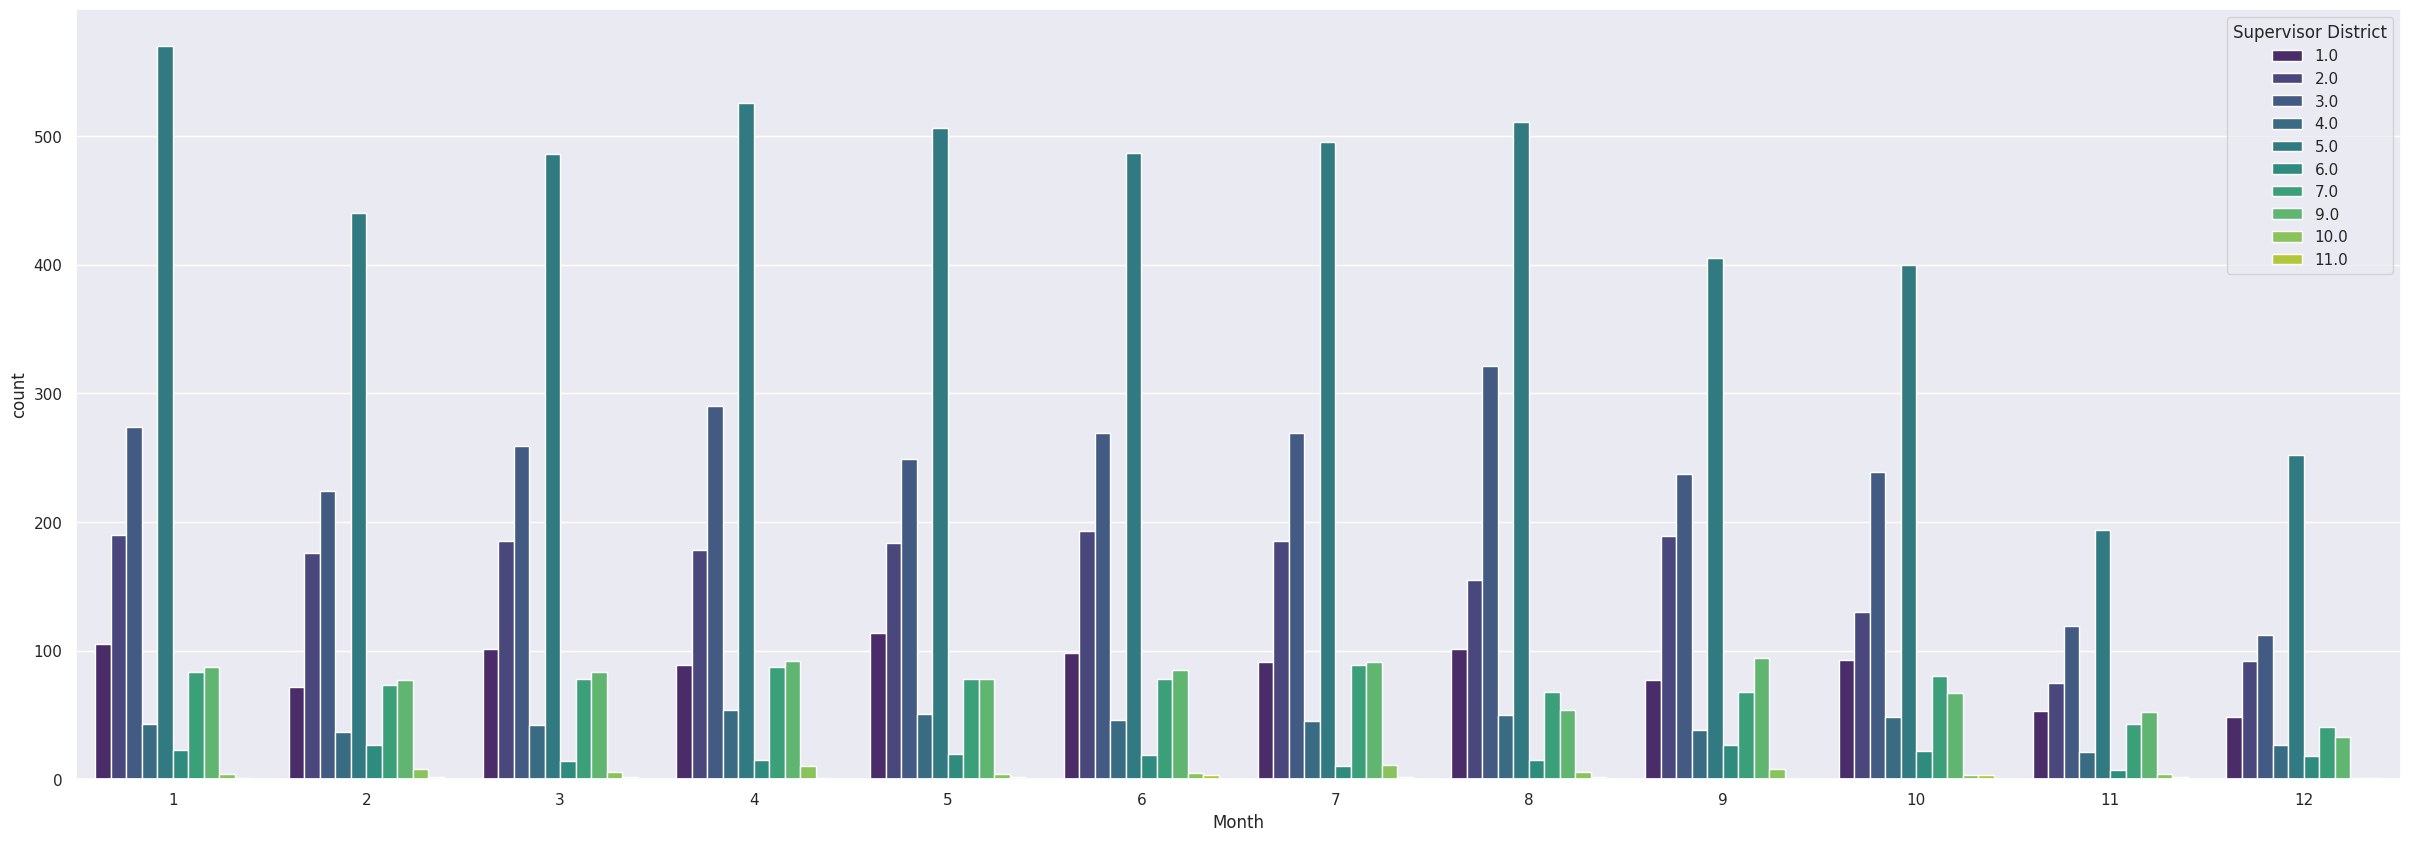

In [35]:
sns.countplot(x = 'Month',data = df, hue ='Supervisor District', palette = 'viridis')

In [39]:
df.isnull().count()

Incident Number          57123
Exposure Number          57123
ID                       57123
Address                  57123
Incident Date            57123
                         ...  
neighborhood_district    57123
point                    57123
Hour                     57123
Month                    57123
Day Week                 57123
Length: 67, dtype: int64

In [60]:
df['Civilian Injuries'].value_counts().head()

0    57102
1       18
2        2
3        1
Name: Civilian Injuries, dtype: int64